# Handling tabular data with _pandas_

Tutorial for pandas: https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

In [ ]:
import pandas as pd
# use pandas-functions via pd

## Loading

In [120]:
csv_filepath = "data/OSTSEE_LT+KIEL.csv"

In [121]:
# have a quick look into the raw file:
!head -n10 $csv_filepath

# OSTSEE_LT+KIEL
time-stamp sea-level-in-m
2018-01-16T00:01 459.000000
2018-01-16T00:02 459.000000
2018-01-16T00:03 459.000000
2018-01-16T00:04 459.000000
2018-01-16T00:05 459.000000
2018-01-16T00:06 459.000000
2018-01-16T00:07 459.000000
2018-01-16T00:08 459.000000


In [133]:
# load csv data
csv_data = pd.read_csv(csv_filepath,
                       skiprows = 1,
                       sep = " ")#,
                       #parse_dates=[0,])
csv_data

,time-stamp,sea-level-in-m
0,2018-01-16T00:01,459.0
1,2018-01-16T00:02,459.0
2,2018-01-16T00:03,459.0
3,2018-01-16T00:04,459.0
4,2018-01-16T00:05,459.0
...,...,...
46075,2018-02-16T23:56,NaN
46076,2018-02-16T23:57,NaN
46077,2018-02-16T23:58,NaN
46078,2018-02-16T23:59,NaN


## Examining

In [134]:
# show statistics
csv_data.describe()

,sea-level-in-m
count,45193.000000
mean,497.246675
std,23.958374
min,426.000000
25%,486.000000
50%,498.000000
75%,510.000000
max,567.000000


<AxesSubplot:>

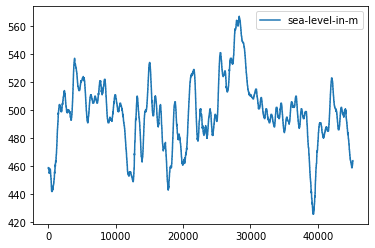

In [135]:
# plot data
csv_data.plot()

## Manipulating

### Change datatype of one column of the data

In [148]:
csv_data.head()

,sea-level-in-m
time-stamp,
2018-01-16 00:01:00,459.0
2018-01-16 00:02:00,459.0
2018-01-16 00:03:00,459.0
2018-01-16 00:04:00,459.0
2018-01-16 00:05:00,459.0


Accessing a column by name: `dataframe['column name']`

using the pandas-function `to_datetime()` to convert column `'time-stamp'` to a real timestamp

In [141]:
csv_data['time-stamp'] = pd.to_datetime(csv_data['time-stamp'])
csv_data = csv_data.set_index('time-stamp')

csv_data.head()

,sea-level-in-m
time-stamp,
2018-01-16 00:01:00,459.0
2018-01-16 00:02:00,459.0
2018-01-16 00:03:00,459.0
2018-01-16 00:04:00,459.0
2018-01-16 00:05:00,459.0


<AxesSubplot:xlabel='time-stamp'>

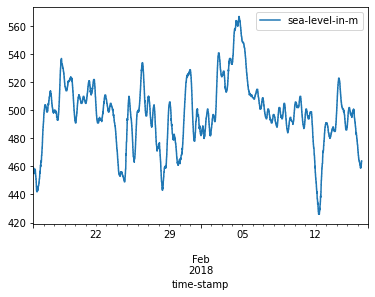

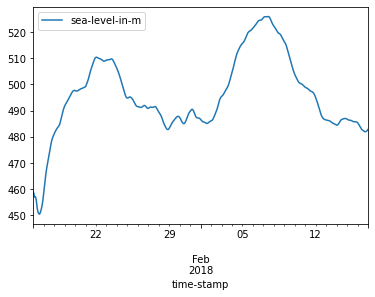

In [147]:
# plot data
csv_data.plot()
csv_data.rolling("5D").mean().plot()